In [2]:
import pandas as pd
from scipy import stats
import numpy as np


# Save Electric_Vehicle_Population_Data.csv as a dataframe
ev_data = pd.read_csv("Electric_Vehicle_Population_Data.csv", encoding='latin-1', dtype={"Postal Code": str})
ev_data = ev_data[["City", "State", "Postal Code"]]

# Save ev_stations_v1.csv as a dataframe
ev_stations = pd.read_csv("ev_stations_v1.csv", encoding='latin-1', dtype={"ZIP": str})
ev_stations = ev_stations[["City", "State", "ZIP", "Access Code"]]
ev_stations = ev_stations[ev_stations['Access Code'] != 'private']

# Save Parking Data.csv as a dataframe
parking_data = pd.read_csv("Parking Data.csv", encoding='latin-1', dtype={"Postal Code": str})
parking_data = parking_data[["Bldg City", "Bldg State", "Total Parking Spaces"]]
parking_data = parking_data.rename(columns={'Bldg City': 'City', 'Bldg State': 'State'})
parking_data = parking_data.groupby(['City', 'State']).sum().reset_index()
parking_data['City'] = parking_data['City'].str.capitalize()



# Save kroger_store.csv as a dataframe
kroger = pd.read_csv("kroger_store.csv", encoding='latin-1', dtype={"postal_code": str})
kroger = kroger[["brand", "city", "state", "postal_code"]]
kroger = kroger[kroger['brand'] == 'KROGER']
kroger = kroger.rename(columns={'brand': 'Brand', 'city': 'City', 'state': 'State', 'postal_code': 'Postal Code'})

# Save target.csv as a dataframe
target = pd.read_csv("target.csv", encoding='latin-1', dtype={"Address.PostalCode": str})
target = target[["Address.City", "Address.Subdivision", "Address.PostalCode"]]
target_zip = target["Address.PostalCode"]
# Remove the numbers after the hyphen and keep the first 5 characters
target_zip = target_zip.str.split("-", expand=True)[0].str[:5]
# Update the "Address.PostalCode" column with the modified values
target["Address.PostalCode"] = target_zip
target.insert(0,'brand', 'Target')
target = target.rename(columns={'brand': 'Brand', 'Address.City': 'City', 'Address.Subdivision': 'State', 'Address.PostalCode': 'Postal Code'})

# Save walmart_2018_11_06.csv as a dataframe
walmart = pd.read_csv("walmart_2018_11_06.csv", encoding='latin-1', dtype={"zip_code": str})
walmart = walmart[["city", "state", "zip_code"]]
walmart.insert(0,'brand', 'Walmart')
walmart = walmart.rename(columns={'brand': 'Brand', 'city': 'City', 'state': 'State', 'zip_code': 'Postal Code'})

# merging the brand dataframes and further cleaning
merged_brands = pd.concat([kroger, target, walmart]).reset_index(drop=True)
merged_brands['No. of Stores'] = merged_brands.groupby('Postal Code')['Postal Code'].transform('count')
# merged_brands = merged_brands.sort_values(by=["No. of Stores", "Postal Code"], ascending=[False, True])

ev_stations_postal_codes = ev_stations['ZIP'].tolist()
merged_brands['Charging Station Exist'] = merged_brands['Postal Code'].isin(ev_stations_postal_codes)

ev_stations_postal_code_counts = ev_stations['ZIP'].value_counts()
merged_brands['No. of Charging Stations'] = merged_brands['Postal Code'].map(ev_stations_postal_code_counts).fillna(0)


ev_data_postal_codes = ev_data['Postal Code'].tolist()
merged_brands['e-Cars exist'] = merged_brands['Postal Code'].isin(ev_data_postal_codes)

ev_data_postal_code_counts = ev_data['Postal Code'].value_counts()
merged_brands['No. of e-Cars'] = merged_brands['Postal Code'].map(ev_data_postal_code_counts).fillna(0)

merged_brands['Total Parking Spaces'] = merged_brands.merge(parking_data, on=['City', 'State'], how='left')['Total Parking Spaces'].fillna(0)

merged_brands['e-cars/stations Ratio'] = merged_brands['No. of e-Cars'] / (merged_brands['No. of Charging Stations'] + 1)


# normalization of values
merged_brands['Norm. Stores']=(merged_brands['No. of Stores']-(merged_brands['No. of Stores'].min()))/(merged_brands['No. of Stores'].max()-merged_brands['No. of Stores'].min())
merged_brands['Norm. Ch.Stations']=(merged_brands['No. of Charging Stations']-(merged_brands['No. of Charging Stations'].min()))/(merged_brands['No. of Charging Stations'].max()-merged_brands['No. of Charging Stations'].min())
merged_brands['Norm. E-cars']=(merged_brands['No. of e-Cars']-(merged_brands['No. of e-Cars'].min()))/(merged_brands['No. of e-Cars'].max()-merged_brands['No. of e-Cars'].min())
merged_brands['Norm. Parking Spaces']=(merged_brands['Total Parking Spaces']-(merged_brands['Total Parking Spaces'].min()))/(merged_brands['Total Parking Spaces'].max()-merged_brands['Total Parking Spaces'].min())
merged_brands['Norm. Ratio']=(merged_brands['e-cars/stations Ratio']-(merged_brands['e-cars/stations Ratio'].min()))/(merged_brands['e-cars/stations Ratio'].max()-merged_brands['e-cars/stations Ratio'].min())


merged_brands['Popularity'] = merged_brands['Norm. Parking Spaces'] * 0.1 + merged_brands['Norm. Ch.Stations'] * 0.15 + merged_brands['Norm. Stores'] * 0.1 + merged_brands['Norm. E-cars'] * 0.15 + merged_brands['Norm. Ratio'] * 0.50
merged_brands = merged_brands.sort_values(by=["Popularity"], ascending=[False])



# counts= ev_data["Postal Code"].value_counts()
# filtered=counts[counts>1]
# print(filtered)
# print("\n")

# counts= ev_stations["ZIP"].value_counts()
# filtered=counts[counts>1]
# print(filtered)
# print("\n")

# counts= merged_brands["Postal Code"].value_counts()
# filtered=counts[counts>1]
# print("Postal Codes with the most Brands")
# print(filtered)
# print("\n")

# counts= parking_data["City"].value_counts()
# filtered=counts[counts>1]
# print("Postal Codes with the most Brands")
# print(filtered, sum(filtered))
# print("\n")

# Print the head of each dataframe
print("Electric Vehicle Data:")
print(ev_data.head().to_string())
print("\n")
# print("Missing values in Electric Vehicle Data:")
# print(ev_data.isnull().sum())
# print("\n")

print("EV Stations Data:")
print(ev_stations.head().to_string())
print("\n")
# print("Missing values in EV Stations Data:")
# print(ev_stations.isnull().sum())
# print("\n")

print("Parking Data:")
print(parking_data.head().to_string())
# print(len(parking_data))
print("\n")
# print("Missing values in Parking Data:")
# print(parking_data.isnull().sum())
# print("\n")

print("Kroger Store Data:")
print(kroger.head().to_string())
print("\n")
# print("Missing values in Kroger Store Data:")
# print(kroger.isnull().sum())
# print("\n")

print("Target Data:")
print(target.head().to_string())
print("\n")
# print("Missing values in Target Data:")
# print(target.isnull().sum())
# print("\n")

print("Walmart Data:")
print(walmart.head().to_string())
print("\n")
# print("Missing values in Walmart Data:")
# print(walmart.isnull().sum())
# print("\n")

print("Merged Brands:")
print(merged_brands.head(10).to_string())
print(len(merged_brands))
print("\n")




C:\Users\micha\AppData\Local\Temp\ipykernel_1676\1095063477.py:11: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  ev_stations = pd.read_csv("ev_stations_v1.csv", encoding='latin-1', dtype={"ZIP": str})


Electric Vehicle Data:
       City State Postal Code
0  Key West    FL       33040
1  Laughlin    NV       89029
2    Yakima    WA       98901
3  Concrete    WA       98237
4   Everett    WA       98201


EV Stations Data:
           City State    ZIP Access Code
2   Los Angeles    CA  90015      public
10     El Monte    CA  91731      public
12     La Jolla    CA  92037      public
13    Sepulveda    CA  91343      public
14    Riverside    CA  92503      public


Parking Data:
       City State  Total Parking Spaces
0  Aberdeen    MD                     6
1  Aberdeen    MS                   140
2  Aberdeen    SD                   232
3  Aberdeen    WA                    17
4   Abilene    TX                    80


Kroger Store Data:
    Brand          City State Postal Code
3  KROGER       Weirton    WV       26062
4  KROGER  Steubenville    OH       43952
5  KROGER     Wellsburg    WV       26070
6  KROGER  Wintersville    OH       43953
7  KROGER      Wheeling    WV       26003




Brand: Walmart, City: 94040
Brand: Walmart, City: 70563
Brand: Walmart, City: 72903
Brand: KROGER, City: 35601
Brand: KROGER, City: 40351


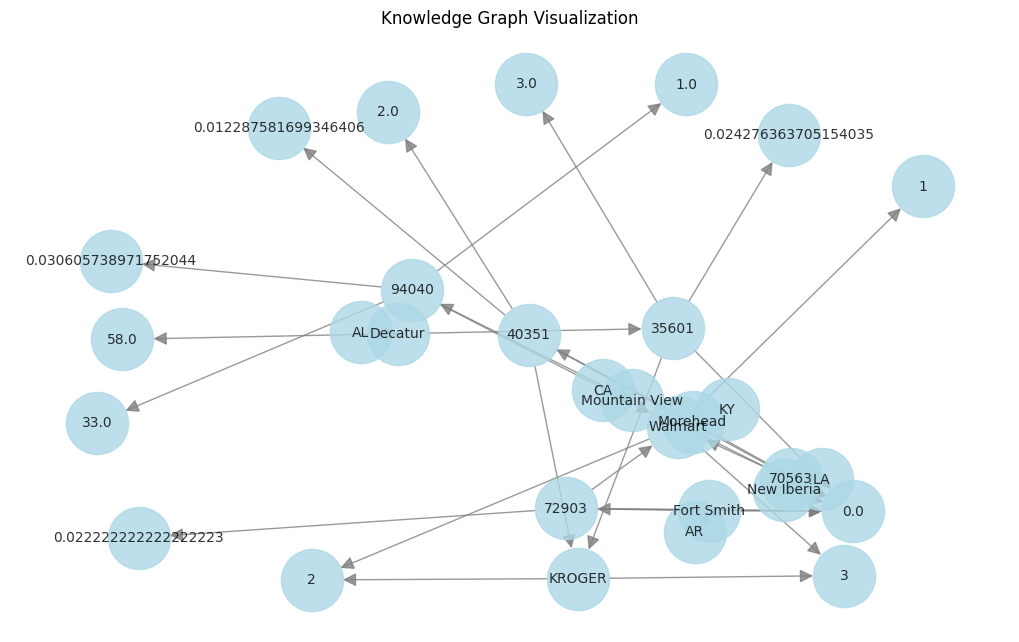

In [5]:
import pandas as pd
from rdflib import Graph, Namespace, Literal
import networkx as nx
import matplotlib.pyplot as plt
from rdflib.plugins.sparql import prepareQuery

# Sample dataframe to use for knowledge graph creation
vis_df = merged_brands.sample(n=5, random_state=42)

# Create a new RDF graph
graph = Graph()

# Define namespaces
my_ns = Namespace("ex:")

# Iterate over the dataframe rows
for _, row in vis_df.iterrows():
    brand = Literal(row['Brand'])
    city = Literal(row['City'])
    state = Literal(row['State'])
    postal_code = Literal(row['Postal Code'])
    parking_space = Literal(row['Total Parking Spaces'])
    e_cars = Literal(row['No. of e-Cars'])
    charging_stations = Literal(row['No. of Charging Stations'])
    stores = Literal(row['No. of Stores'])
    popularity = Literal(row['Popularity'])

    # Add triples to the graph
    graph.add((state, my_ns.hasCity, city))
    graph.add((city, my_ns.hasPostal, postal_code))
    graph.add((city, my_ns.hasParkingSpace, parking_space))
    graph.add((postal_code, my_ns.hasE_cars, e_cars))
    graph.add((postal_code, my_ns.hasChargingStations, charging_stations))
    graph.add((postal_code, my_ns.hasBrand, brand))
    graph.add((brand, my_ns.hasTotalStores, stores))
    graph.add((postal_code, my_ns.hasPopularity, popularity))

# Convert the RDF graph to a NetworkX MultiDiGraph
nx_graph = nx.MultiDiGraph()

for s, p, o in graph:
    nx_graph.add_edge(str(s), str(o), label=str(p))

# Visualize the graph
pos = nx.spring_layout(nx_graph)
plt.figure(figsize=(10, 6))
nx.draw(
    nx_graph,
    pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    font_size=10,
    node_size=2000,
    alpha=0.8,
    arrowsize=20
)

# SPARQL query
query = prepareQuery(
    """
    SELECT ?brand ?city
    WHERE {
        ?city ex:hasBrand ?brand .
    }
    """,
    initNs={"ex": my_ns}
)

# Execute the SPARQL query on the graph
results = graph.query(query)

# Process and print the query results
for row in results:
    brand = row.brand
    city = row.city
    print(f"Brand: {brand}, City: {city}")

plt.title("Knowledge Graph Visualization")
plt.show()


In [ ]:
# ignore the cells below

In [ ]:
# # Extract postal codes from each dataframe
# ev_data_postal_codes = set(ev_data["Postal Code"].dropna())
# ev_stations_postal_codes = set(ev_stations["ZIP"].dropna())
# kroger_postal_codes = set(kroger["Postal Code"].dropna())
# target_postal_codes = set(target["Postal Code"].dropna())
# walmart_postal_codes = set(walmart["Postal Code"].dropna())

# # Find common postal codes and their count
# common_zip_codes_of_markets = kroger_postal_codes.intersection(target_postal_codes, walmart_postal_codes)
# common_zip_codes_of_markets_count = len(common_zip_codes_of_markets)

# common_postal_codes = ev_stations_postal_codes.intersection(common_zip_codes_of_markets)
# common_postal_codes_count = len(common_postal_codes)

# cocommon_zip_codes_of_markets_and_cars = ev_data_postal_codes.intersection(common_zip_codes_of_markets)
# cocommon_zip_codes_of_markets_and_cars_count = len(cocommon_zip_codes_of_markets_and_cars)
# filtered_df = merged_brands[merged_brands['Postal Code'].isin(cocommon_zip_codes_of_markets_and_cars)]

# common_zip_codes_of_cars_and_stations = ev_data_postal_codes.intersection(ev_stations_postal_codes)
# common_zip_codes_of_cars_and_stations_count = len(common_zip_codes_of_cars_and_stations)


# # Print the common postal codes and their count
# print("Common Postal Codes of the Brands:")
# print(common_zip_codes_of_markets)
# print("Count of Common Market Codes: {}".format(common_zip_codes_of_markets_count))
# print("\n")

# print("Common Postal Codes:")
# print(common_postal_codes)
# print("Count of Common Postal Codes: {}".format(common_postal_codes_count))
# print("\n")

# print("Common Market and Car Codes:")
# print(cocommon_zip_codes_of_markets_and_cars)
# print("Count of Common Market and Car Codes: {}".format(cocommon_zip_codes_of_markets_and_cars_count))
# print(filtered_df.to_string())
# print("\n")

# print("Common Car and Station Codes:")
# print(common_zip_codes_of_cars_and_stations)
# print("Count of Common Car and Station Codes: {}".format(common_zip_codes_of_cars_and_stations_count))
# print("\n")

In [2]:
# import geopandas as gpd
# import plotly.express as px

# # Load the shapefile
# shapefile_path = 'USA_ZIP_Code_Boundaries.shp'
# shapefile_data = gpd.read_file(shapefile_path)

# # Merge with the merged dataframe to include the EV stations count
# merged_data = shapefile_data.merge(merged_brands, left_on='ZIP_CODE', right_on='Postal Code', how='left')

# # Create the choropleth map
# fig = px.choropleth(merged_data, 
#                     geojson=merged_data.geometry, 
#                     locations='ZIP_CODE', 
#                     color='Popularity', 
#                     hover_data=['Popularity'],
#                     color_continuous_scale='Viridis',
#                     labels={'Popularity': 'Popularity'})

# # Update the map layout
# fig.update_layout(title='Popularity by Postal Code',
#                   geo=dict(showframe=False,
#                            showcoastlines=False,
#                            projection_type='equirectangular'))

# # Show the map
# fig.show()